# 지하철

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
f = open('CARD_SUBWAY_MONTH_201901.csv', encoding='utf-8')

head = f.readline()
# s = head.strip().split(',')
# [i.strip('"') for i in s]

data = []

for line in f:
    l = line.strip().split(',')
    l2 = [i.strip('"') for i in l]
    
    l2[0] = int(l2[0])
    l2[2] = int(l2[2])
    l2[4] = int(l2[4])
    l2[5] = int(l2[5])
    l2[6] = int(l2[6])
    l2.append(l2[0]//10000)
    l2.append((l2[0]//100)%100) # (l2[0]%10000)//100
    l2.append(l2[0]%100)
    
    data.append(l2)

f.close()

In [20]:
len(data)

18334

In [22]:
data[-10:]

[[20190131, '2호선', 201, '시청', 29981, 29575, 20190203, 2019, 1, 31],
 [20190131, '1호선', 159, '동묘앞', 9483, 9727, 20190203, 2019, 1, 31],
 [20190131, '1호선', 158, '청량리(서울시립대입구)', 29384, 30328, 20190203, 2019, 1, 31],
 [20190131, '1호선', 157, '제기동', 25142, 26221, 20190203, 2019, 1, 31],
 [20190131, '1호선', 156, '신설동', 18001, 17784, 20190203, 2019, 1, 31],
 [20190131, '1호선', 155, '동대문', 14563, 15139, 20190203, 2019, 1, 31],
 [20190131, '1호선', 154, '종로5가', 30249, 29703, 20190203, 2019, 1, 31],
 [20190131, '1호선', 153, '종로3가', 36804, 35050, 20190203, 2019, 1, 31],
 [20190131, '1호선', 152, '종각', 51970, 50080, 20190203, 2019, 1, 31],
 [20190131, '1호선', 151, '시청', 29059, 29169, 20190203, 2019, 1, 31]]

In [23]:
data2 = [ [line[4], line[5]] for line in data ]
data2[:10]

[[1520, 1436],
 [275, 114],
 [1509, 1083],
 [357, 271],
 [1772, 1963],
 [787, 765],
 [2649, 2661],
 [734, 726],
 [1347, 1534],
 [1542, 1516]]

In [24]:
subway = np.array(data2, dtype=float)
subway.shape

(18334, 2)

(0, 30000)

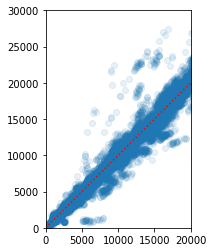

In [38]:
import matplotlib.pyplot as plt

plt.scatter(subway[:,0], subway[:,1], alpha=0.1)
plt.plot([0,150000],[0,150000],'r:')
plt.axis('scaled')
plt.xlim(0,20000)
plt.ylim(0,30000)

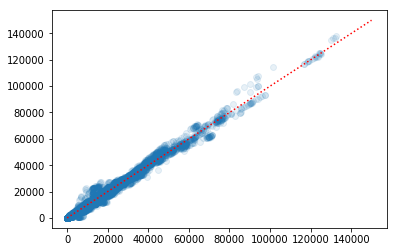

In [35]:
plt.scatter(subway[:,0], subway[:,1], alpha=0.1)
plt.plot([0,150000],[0,150000],'r:')
#plt.axis('scaled')
# plt.xlim(0,1000)
# plt.ylim(0,1000)

In [54]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(subway[:,[0]], subway[:,1])

display(model.coef_, model.intercept_)
display(model.score(subway[:,[0]], subway[:,1]))

array([1.00866016])

-156.5876922830248

0.9886980443792561

Text(0.5,0,'boarding')

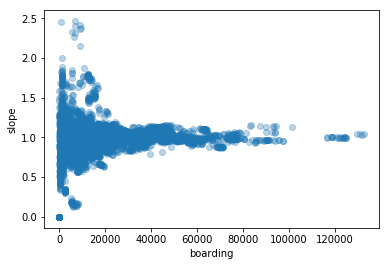

In [53]:
a = subway[:,1]/subway[:,0] # 각 점의 기울기를 알아낸다

plt.scatter(subway[:,0], a, alpha=0.3)
plt.ylabel('slope')
plt.xlabel('boarding')

In [44]:
sort_a = np.argsort(a)

In [45]:
sort_a[-10:]

array([ 2498,  3443, 15947,   330, 11019, 15259,  7476,  6567,    19,
       11361], dtype=int64)

In [47]:
data[11361]

[20190120, '4호선', 426, '서울역', 6619, 16305, 20190123, 2019, 1, 20]

In [52]:
data[2498]

[20190105, '4호선', 426, '서울역', 9182, 19741, 20190108, 2019, 1, 5]

## Pandas 적용 예시

In [56]:
import pandas as pd

cols = ["사용일자","노선명","역ID","역명","승차총승객수","하차총승객수","등록일자",
       "년", "월", "일"]
subway_df = pd.DataFrame(data, columns=cols)

In [57]:
subway_df

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,년,월,일
0,20190101,경춘선,1323,가평,1520,1436,20190104,2019,1,1
1,20190101,경춘선,1322,상천,275,114,20190104,2019,1,1
2,20190101,경춘선,1321,청평,1509,1083,20190104,2019,1,1
3,20190101,경춘선,1320,대성리,357,271,20190104,2019,1,1
4,20190101,경춘선,1319,마석,1772,1963,20190104,2019,1,1
5,20190101,경춘선,1318,천마산,787,765,20190104,2019,1,1
6,20190101,경춘선,1317,평내호평,2649,2661,20190104,2019,1,1
7,20190101,경춘선,1316,금곡,734,726,20190104,2019,1,1
8,20190101,경춘선,1315,사릉,1347,1534,20190104,2019,1,1
9,20190101,경춘선,1314,퇴계원,1542,1516,20190104,2019,1,1


In [58]:
subway_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18334 entries, 0 to 18333
Data columns (total 10 columns):
사용일자      18334 non-null int64
노선명       18334 non-null object
역ID       18334 non-null int64
역명        18334 non-null object
승차총승객수    18334 non-null int64
하차총승객수    18334 non-null int64
등록일자      18334 non-null int64
년         18334 non-null int64
월         18334 non-null int64
일         18334 non-null int64
dtypes: int64(8), object(2)
memory usage: 1.4+ MB


In [59]:
subway_df.describe()

,사용일자,역ID,승차총승객수,하차총승객수,등록일자,년,월,일
count,1.833400e+04,18334.000000,18334.000000,18334.000000,1.833400e+04,18334.0,18334.0,18334.000000
mean,2.019012e+07,1882.867296,12100.360751,12048.564143,2.019013e+07,2019.0,1.0,16.002182
std,8.945375e+00,1178.994356,12968.981816,13155.849968,2.615326e+01,0.0,0.0,8.945375
min,2.019010e+07,150.000000,1.000000,0.000000,2.019010e+07,2019.0,1.0,1.000000
25%,2.019011e+07,1030.000000,3848.250000,3661.250000,2.019011e+07,2019.0,1.0,8.000000
50%,2.019012e+07,1812.000000,8364.000000,8177.000000,2.019012e+07,2019.0,1.0,16.000000
75%,2.019012e+07,2634.000000,15865.000000,15733.750000,2.019013e+07,2019.0,1.0,24.000000
max,2.019013e+07,4713.000000,132727.000000,137826.000000,2.019020e+07,2019.0,1.0,31.000000


In [63]:
subway_df.승차총승객수
subway_df['승차총승객수']
subway_df.iloc[:5, :3]

,사용일자,노선명,역ID
0,20190101,경춘선,1323
1,20190101,경춘선,1322
2,20190101,경춘선,1321
3,20190101,경춘선,1320
4,20190101,경춘선,1319


In [69]:
subway2 = np.array(subway_df[['승차총승객수', '하차총승객수']])

array([[ 1520,  1436],
       [  275,   114],
       [ 1509,  1083],
       ...,
       [36804, 35050],
       [51970, 50080],
       [29059, 29169]], dtype=int64)

In [74]:
subway_df['노선명'].unique()

array(['경춘선', '경인선', '경의선', '경원선', '경부선', '2호선', '경강선', '수인선', '분당선',
       '9호선2~3단계', '9호선', '8호선', '7호선', '6호선', '공항철도 1호선', '5호선', '4호선',
       '3호선', '1호선', '중앙선', '안산선', '우이신설선', '일산선', '장항선', '과천선'],
      dtype=object)

In [77]:
subway_df['역명'].value_counts()

서울역             164
공덕              124
김포공항            102
홍대입구             95
신설동              93
고속터미널            93
동대문역사문화공원        93
왕십리(성동구청)        93
디지털미디어시티         93
종로3가             93
선릉               62
노량진              62
효창공원앞            62
삼각지              62
인천               62
동묘앞              62
영등포구청            62
청량리(서울시립대입구)     62
오금               62
잠실(송파구청)         62
종합운동장            62
청구               62
천호(풍납토성)         62
도곡               62
합정               62
충정로(경기대입구)       62
올림픽공원(한국체대)      62
수원               62
당산               62
양평               62
               ... 
쌍용(나사렛대)         31
월롱               31
금호               31
개화               31
미아(서울사이버대학)      31
공릉(서울과학기술대)      31
마두               31
녹번               31
정자               31
오산               31
백양리              31
어린이대공원(세종대)      31
상도               31
길음               31
미금               31
답십리              31
신목동              31
면목               31
용문               31
